In [1]:
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
con = sqlite3.connect(r'../../03processed-data/Richard.sqlite3')

In [4]:
soilwater = pd.read_sql("SELECT * FROM SoilWater",
                       con)

In [5]:
soilwater_AD = soilwater.loc[soilwater['Site']=="AshleyDene"]
soilwater_AD
# soilwater_AD.set_index(['Sowing.Date','Rep', 'DAS'], inplace = True)
pattern = '|'.join(['DAS','Rep','SWC'])
pattern

SD1 = soilwater_AD.loc[soilwater_AD['Sowing.Date'] == 'SD1'].filter(regex = pattern)
# .drop(columns = ['SWC.2.3.m..mm.'])

In [6]:
SD1.dtypes

Rep               float64
DAS               float64
SWC.0.1           float64
SWC.0.2           float64
SWC.0.3           float64
SWC.0.4           float64
SWC.0.5           float64
SWC.0.6           float64
SWC.0.7           float64
SWC.0.8           float64
SWC.0.9           float64
SWC.0.10          float64
SWC.0.11          float64
SWC.0.12          float64
SWC.0.13          float64
SWC.0.14          float64
SWC.0.15          float64
SWC.0.16          float64
SWC.0.17          float64
SWC.0.18          float64
SWC.0.19          float64
SWC.0.20          float64
SWC.0.21          float64
SWC.0.22          float64
SWC.0.23          float64
SWC.2.3.m..mm.    float64
dtype: object

In [7]:
SD1['Rep']=SD1['Rep'].astype('category')
SD1['DAS']=SD1['DAS'].astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


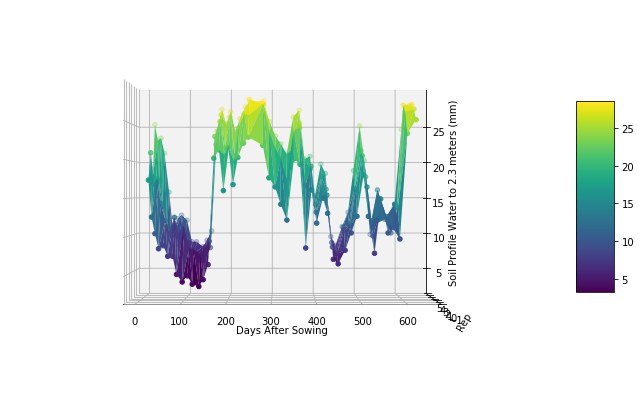

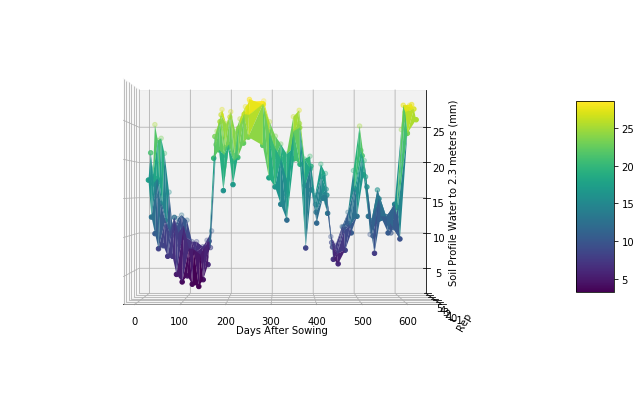

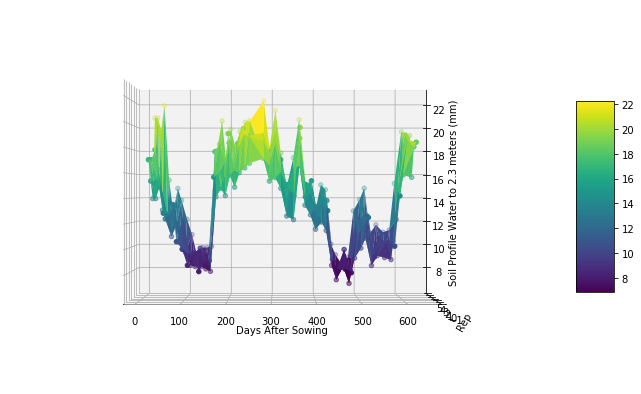

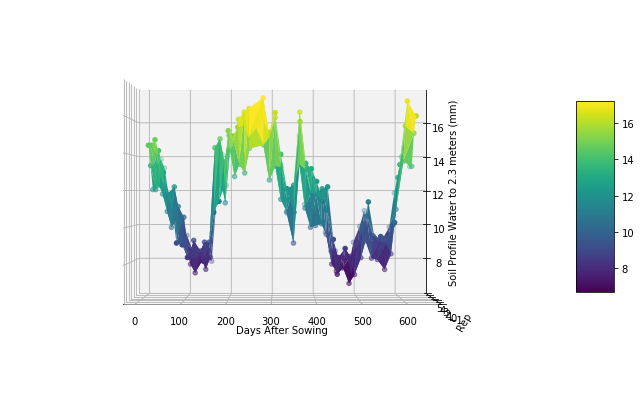

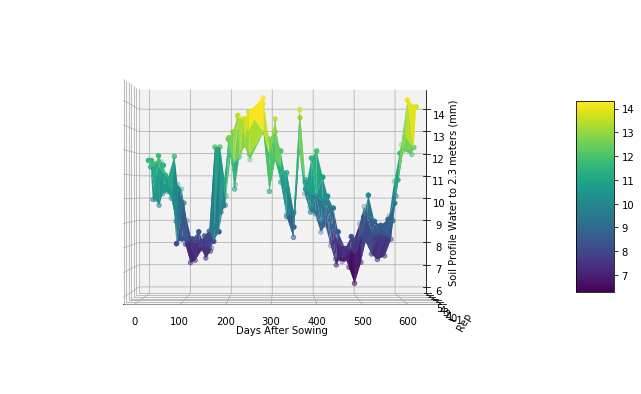

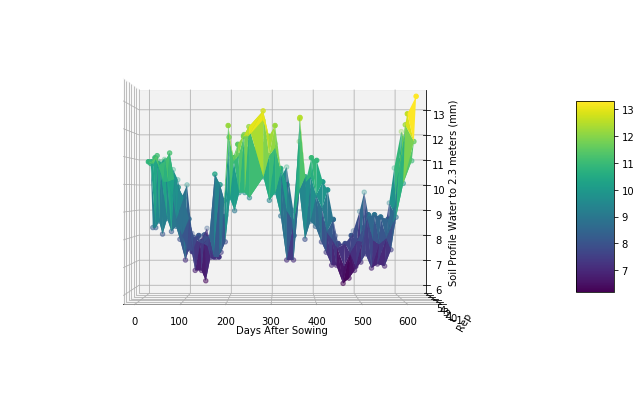

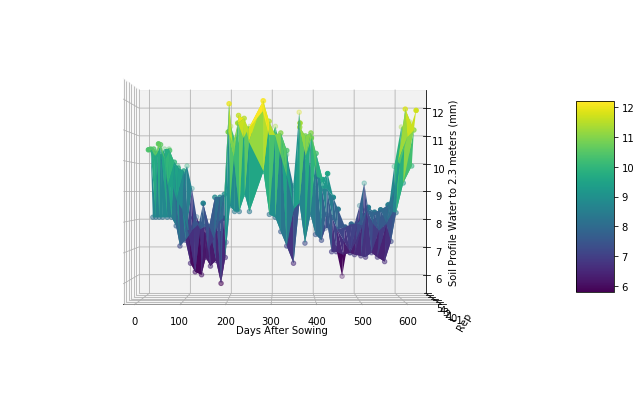

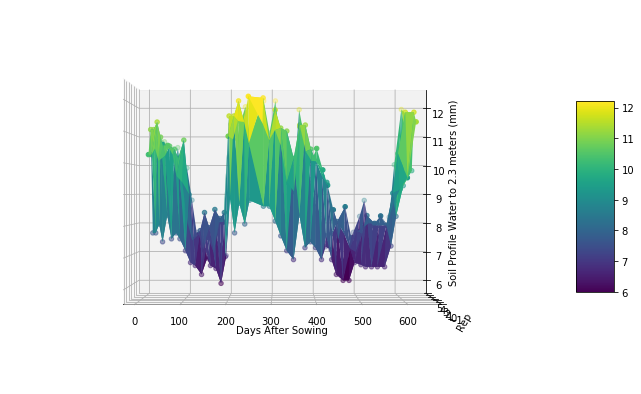

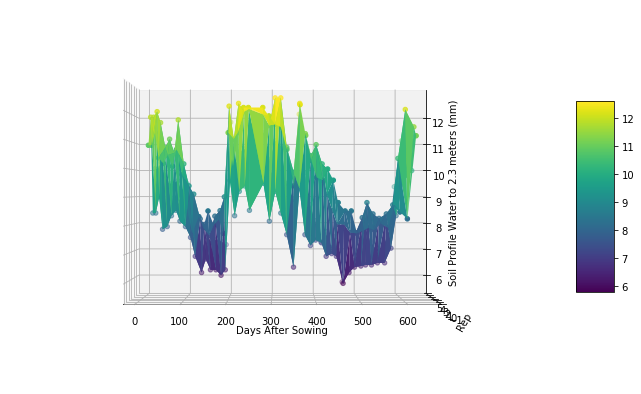

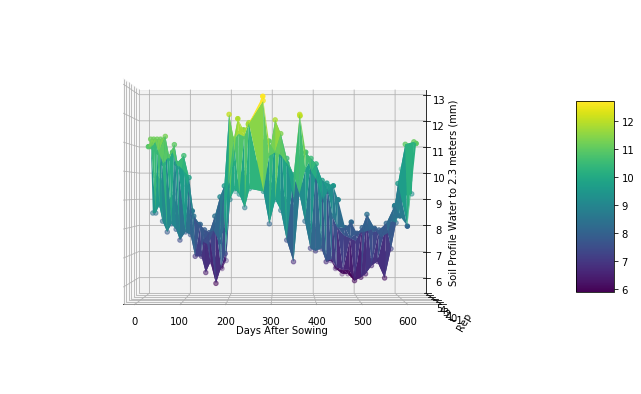

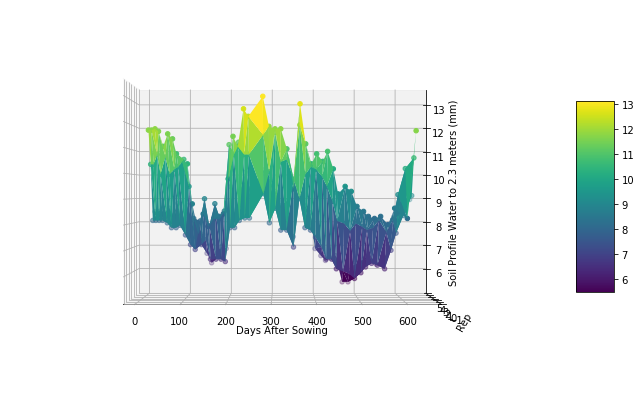

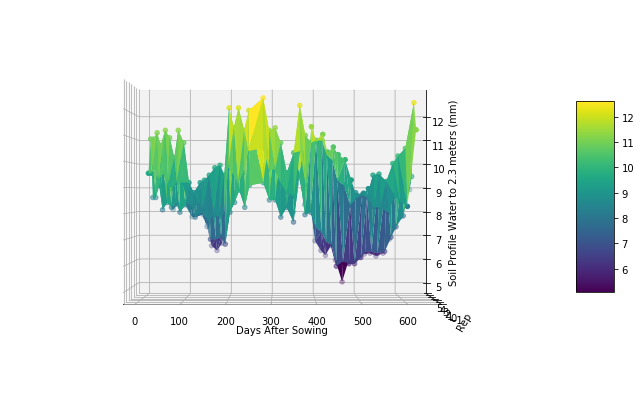

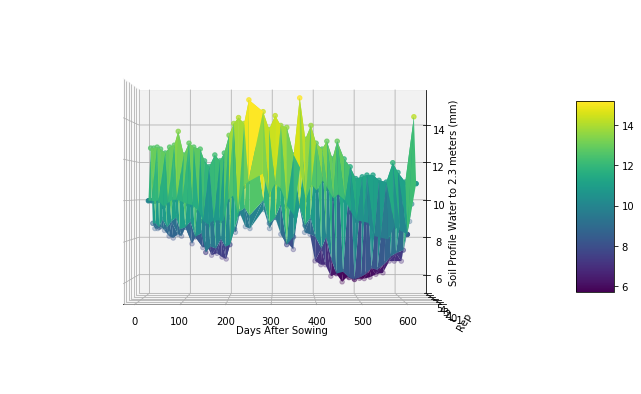

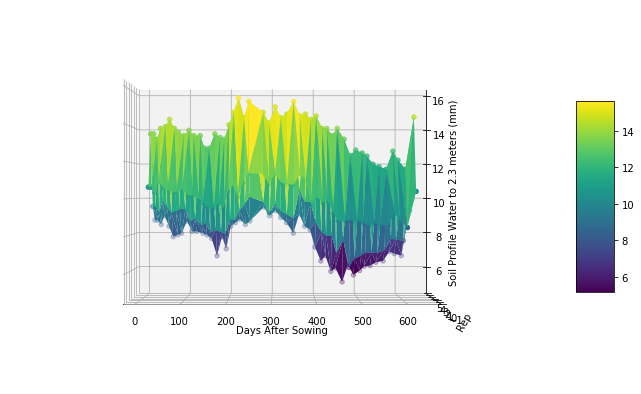

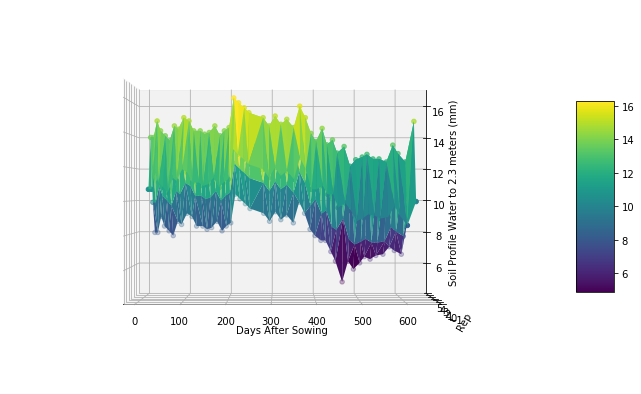

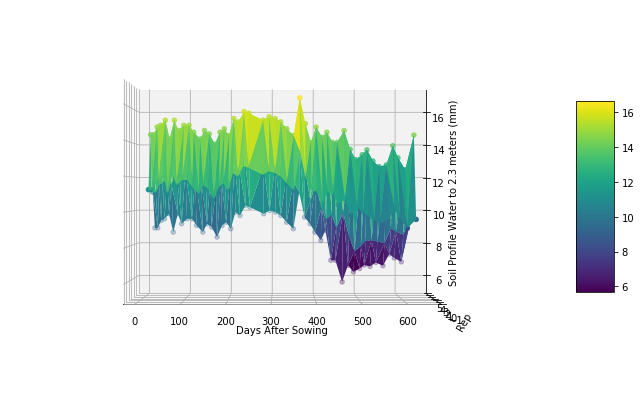

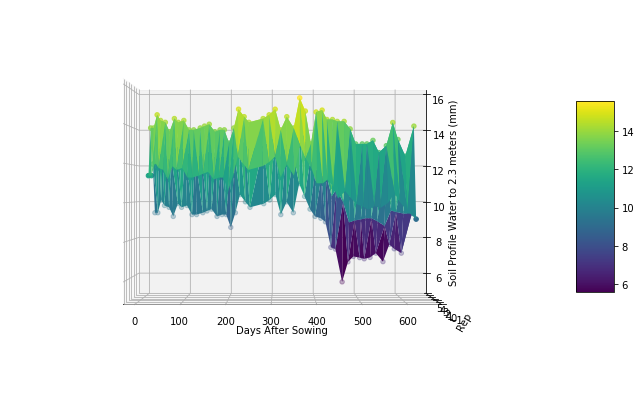

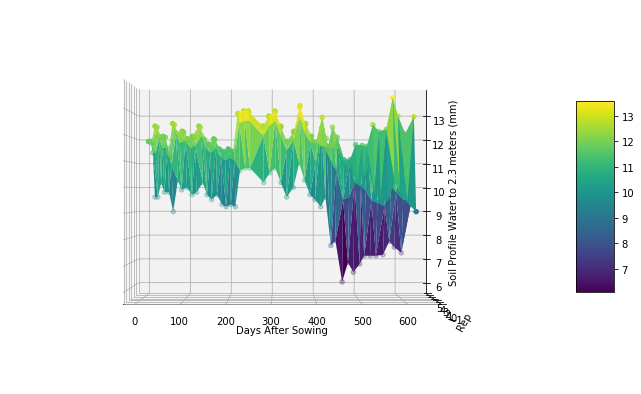

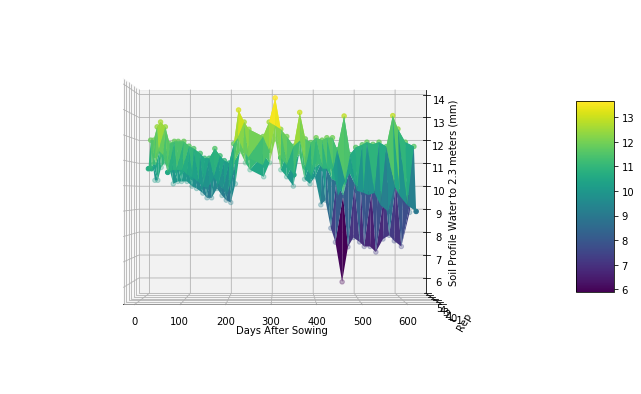

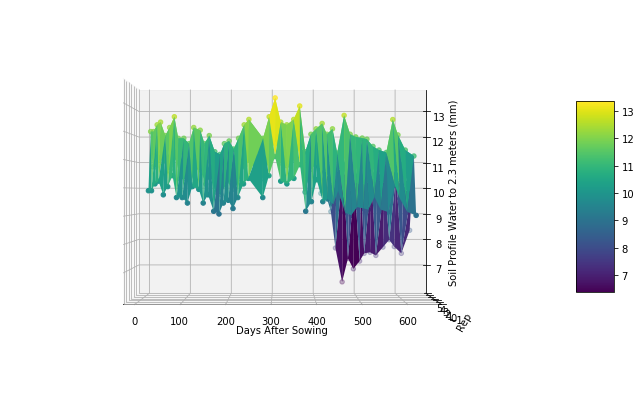

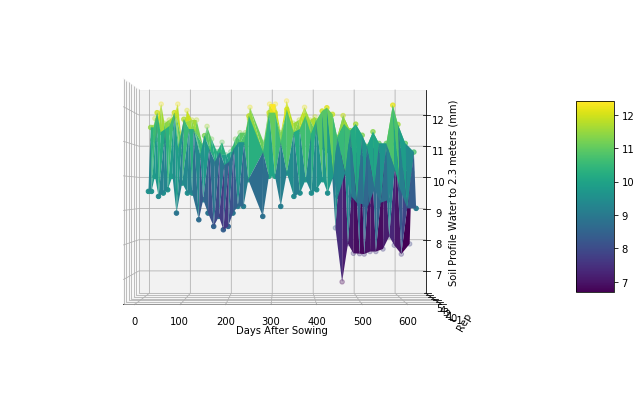

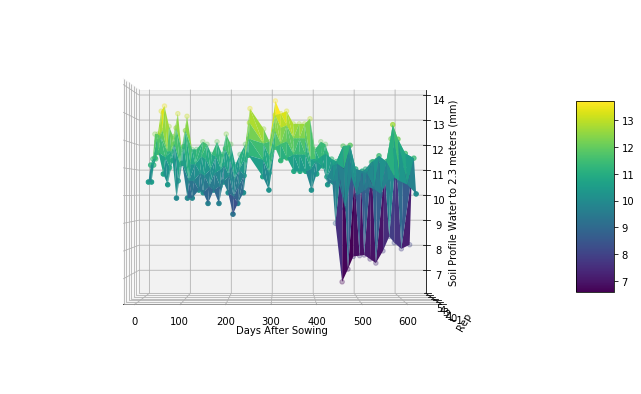

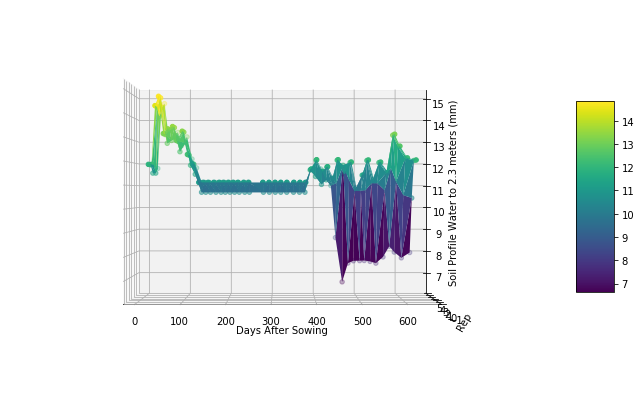

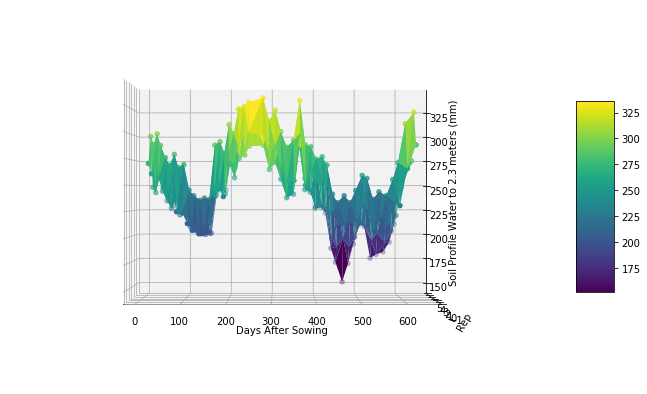

In [23]:
for column in SD1.columns[2:]:
    df = SD1.loc[:, ["Rep","DAS", column]]
#     print(df)
    fig = plt.figure(figsize=(12,7))
    ax = fig.gca(projection='3d')

    scatter = ax.scatter3D(df['DAS'],df['Rep'],df[column],c = df[column], marker='o', cmap='viridis')
    ax.set_ylim3d(-1, 5)
    ax.plot_trisurf(df['DAS'],df['Rep'],df[column],  cmap='viridis', linewidth=0.2)
    ax.set_ylim3d(-1, 5)

    fig.colorbar( scatter, shrink=0.5, aspect=5)

    ax.set_xlabel('Days After Sowing')
    ax.set_ylabel('Rep', rotation = 60)
    ax.set_zlabel('Soil Profile Water to 2.3 meters (mm)')
    ax.yaxis._axinfo['label']['space_factor'] = 3.0

    ax.view_init(0, 270)
plt.tight_layout
plt.savefig('foo.png', dpi = 300, pad_inches = 0.5)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

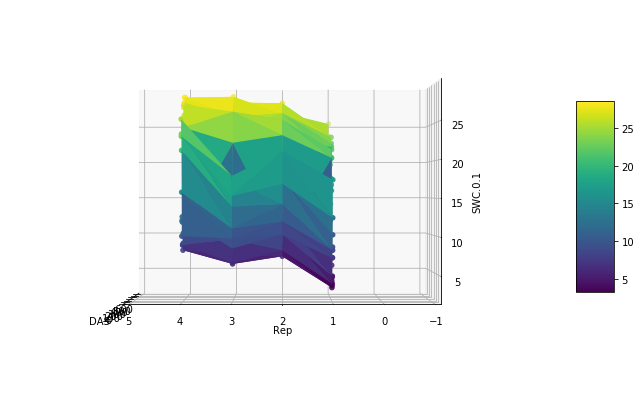

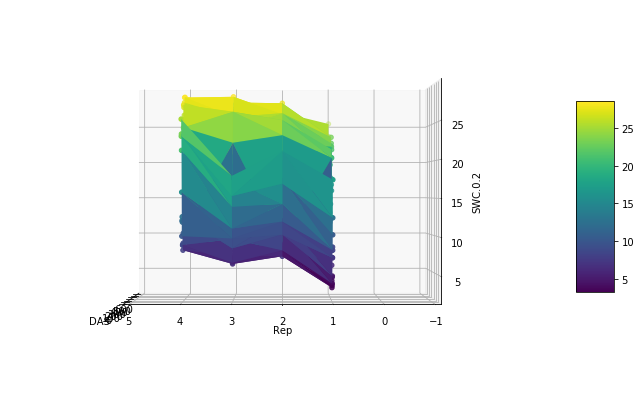

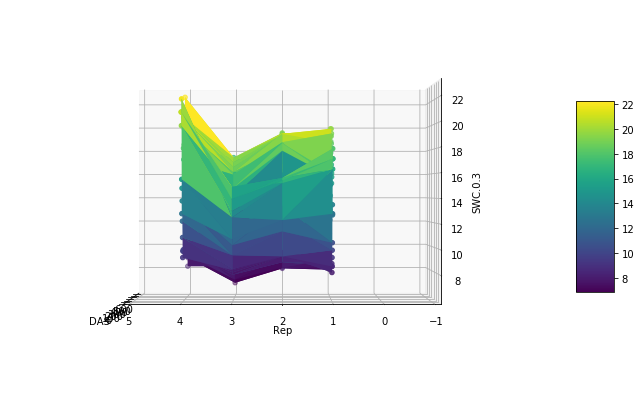

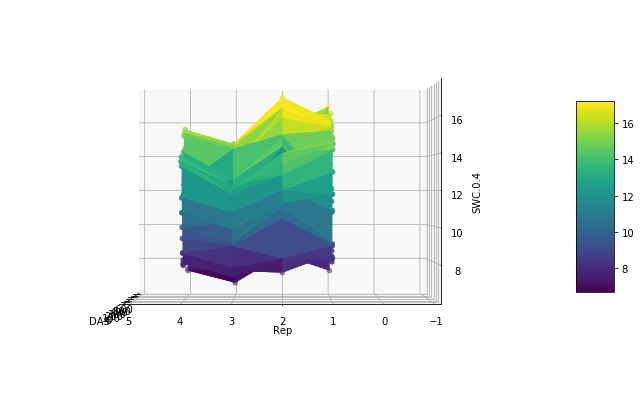

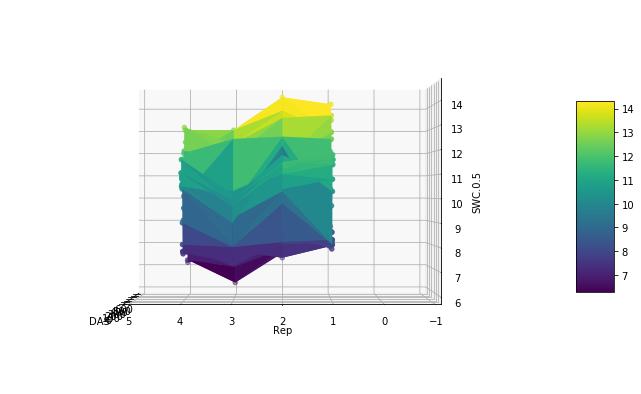

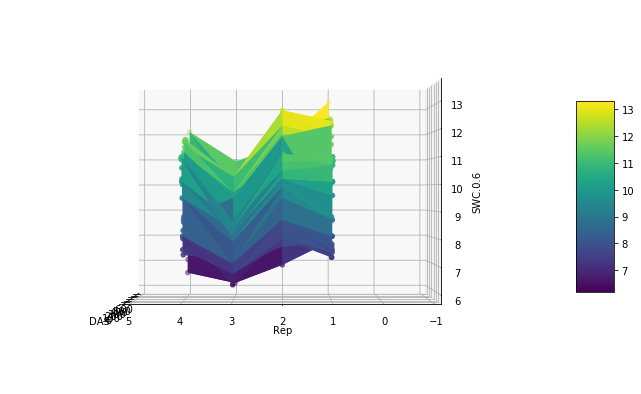

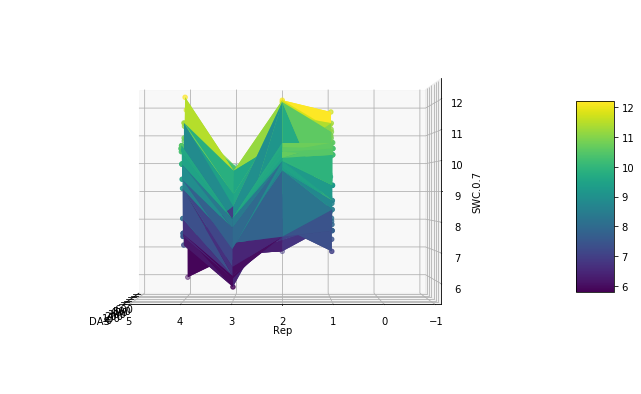

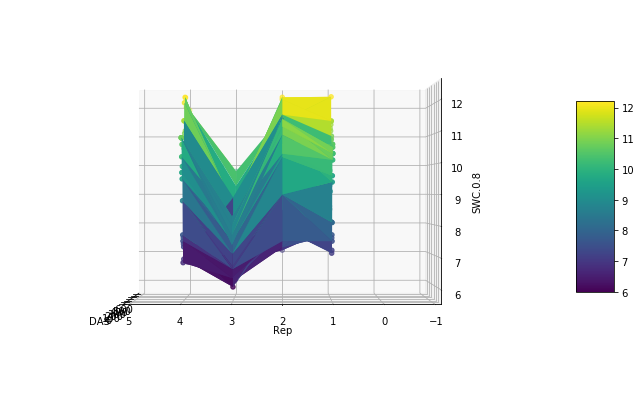

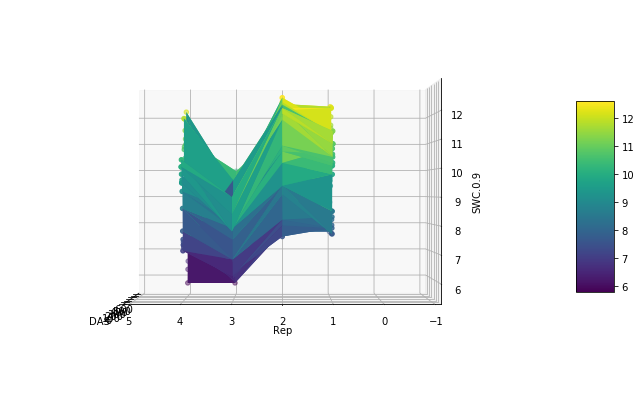

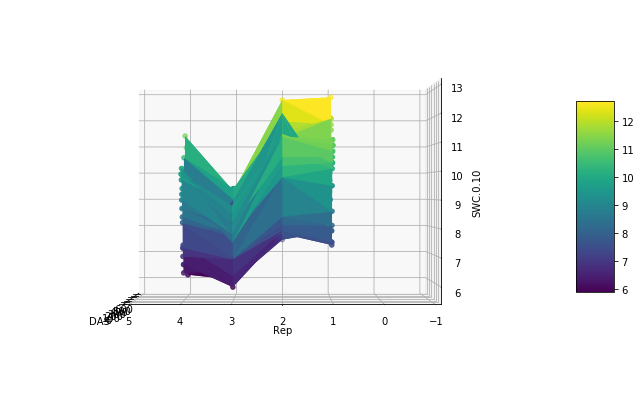

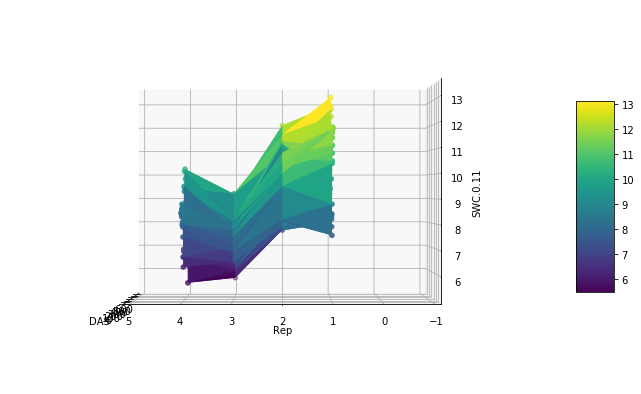

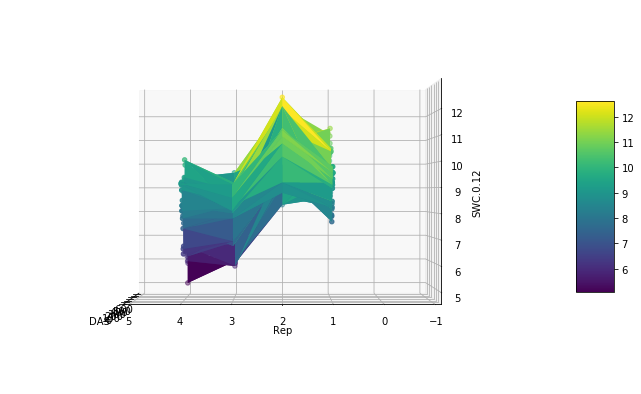

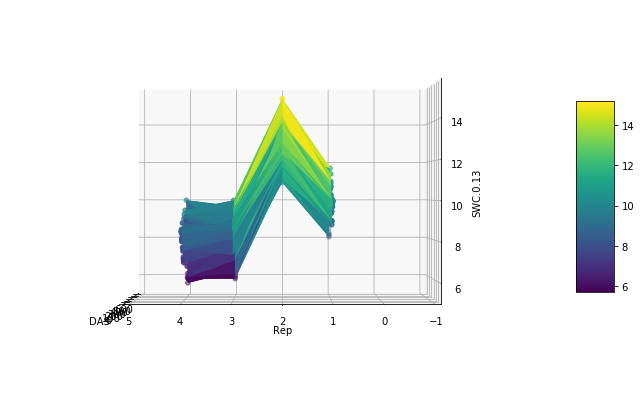

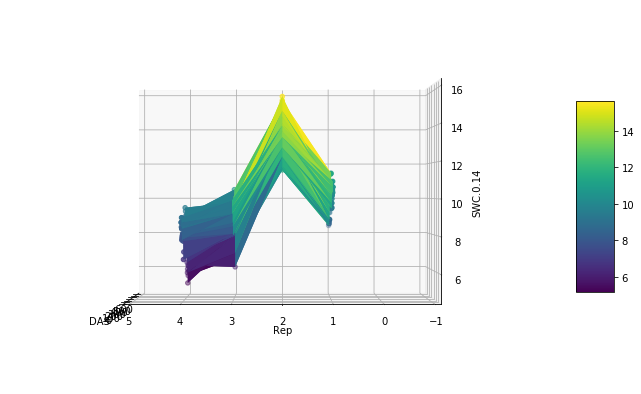

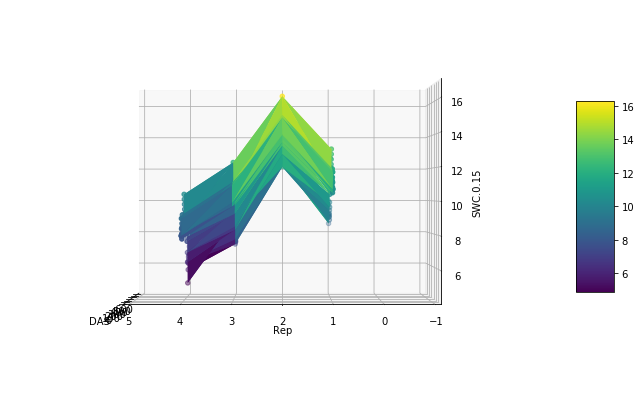

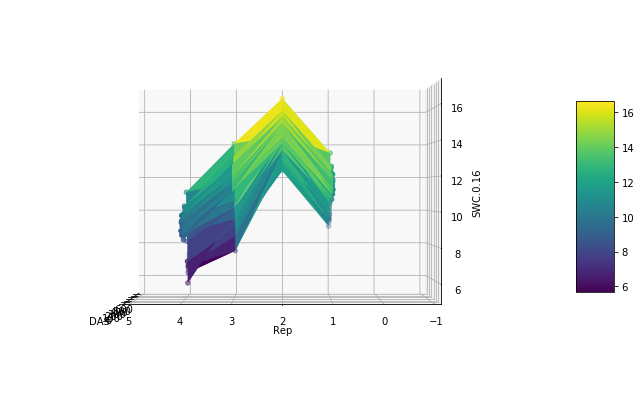

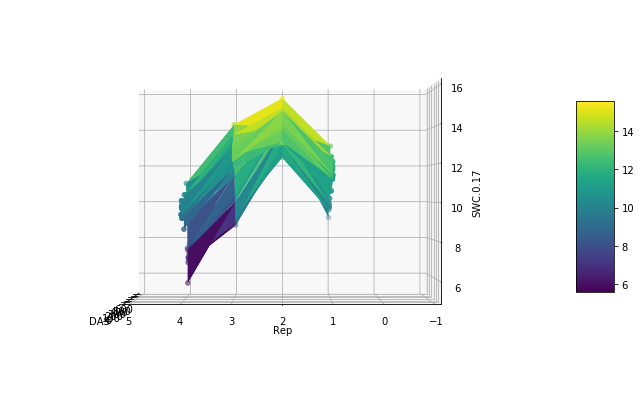

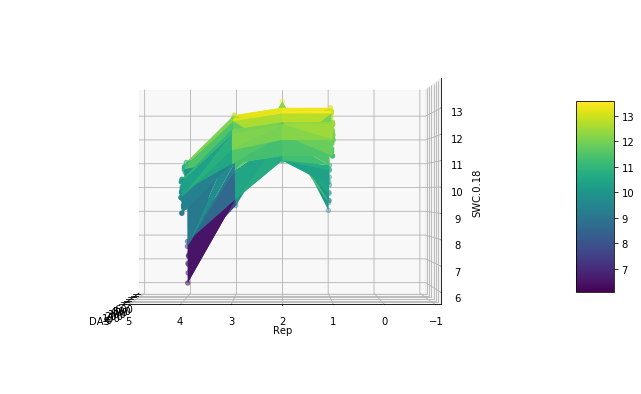

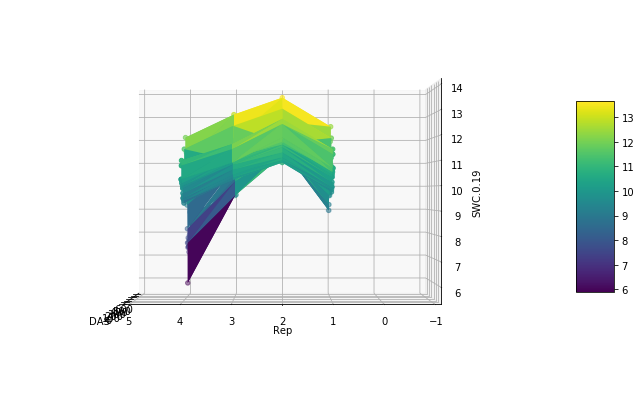

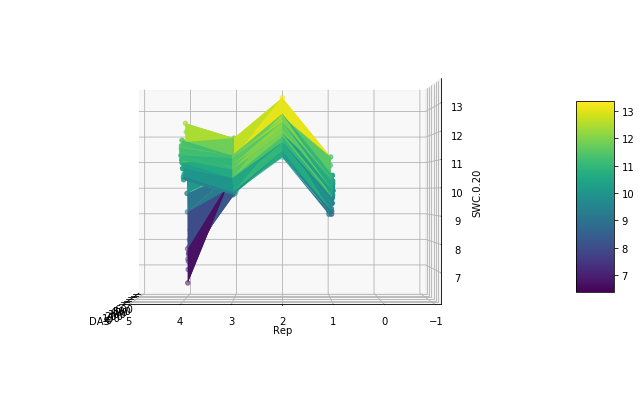

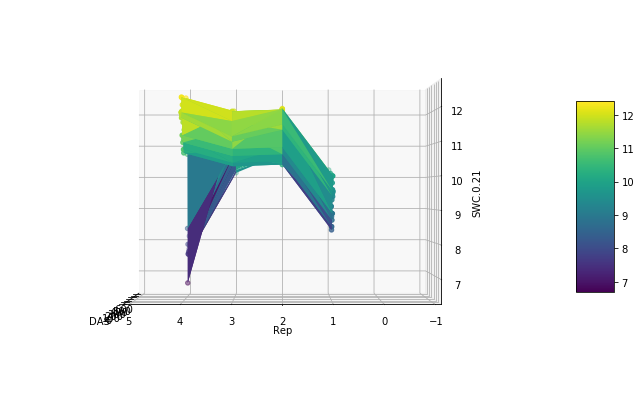

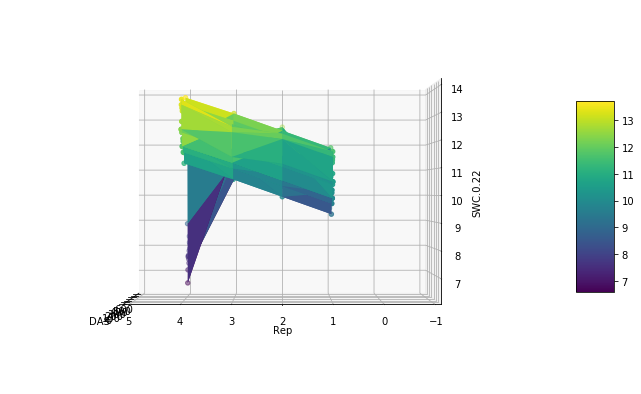

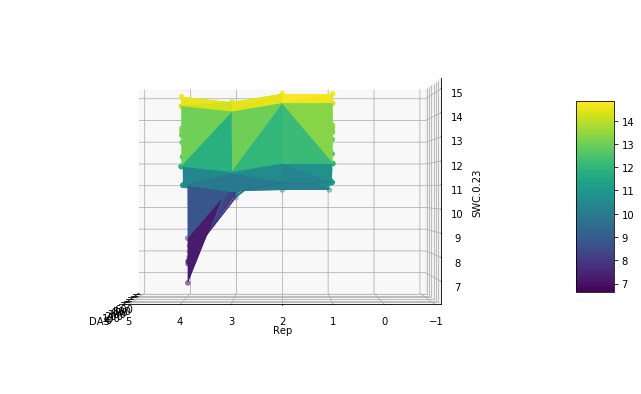

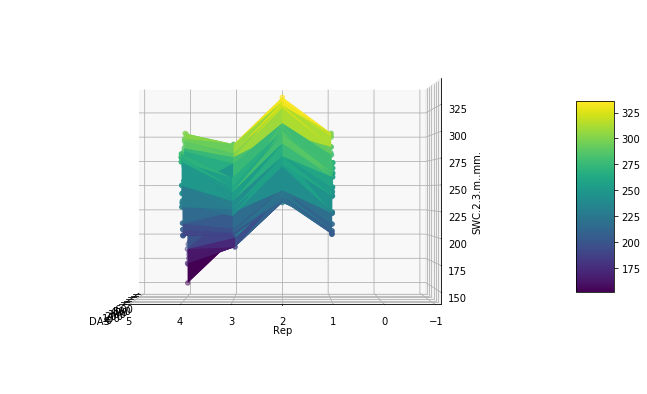

In [8]:
for column in SD1.columns[2:]:
    df = SD1.loc[:, ["Rep","DAS", column]]
#     print(df)
    fig = plt.figure(figsize=(12,7))
    ax = fig.gca(projection='3d')

    scatter = ax.scatter3D(df['DAS'],df['Rep'],df[column],c = df[column], marker='o', cmap='viridis')
    ax.set_ylim3d(-1, 5)
    ax.plot_trisurf(df['DAS'],df['Rep'],df[column],  cmap='viridis', linewidth=0.2)
    ax.set_ylim3d(-1, 5)

    fig.colorbar( scatter, shrink=0.5, aspect=5)

    ax.set_xlabel('DAS')
    ax.set_ylabel('Rep')
    ax.set_zlabel(column)

    ax.view_init(0, 180)
plt.tight_layout

In [ ]:
# df = SD1.loc[:, 'SWC.0.1']
# df.dtypes
# df.columns=["Rep","DAS","SWC"]
# df.dtypes

# # pd.Categorical(df['Rep'])
# # df['DAS']=df['DAS'].cat.codes

In [ ]:
# from matplotlib.collections import PolyCollection
# from matplotlib import colors as mcolors

# fig = plt.figure(figsize=plt.figaspect(0.5))
# ax = fig.add_subplot(1,2,1, projection='3d')
#===============
#  First subplot
#===============
# # set up the axes for the first plot
# fig = plt.figure(figsize=(12,7))
# ax = fig.gca(projection='3d')

# scatter = ax.scatter3D(df['Date'],df['Rep'],df['SWC'],c = df['SWC'], marker='o', cmap='viridis')
# ax.set_ylim3d(-1, 5)
# ax.plot_trisurf(df['Date'],df['Rep'],df['SWC'],  cmap='viridis', linewidth=0.2)
# ax.set_ylim3d(-1, 5)

# fig.colorbar( scatter, shrink=0.5, aspect=5)

# ax.set_xlabel('Date')
# ax.set_ylabel('Rep')
# ax.set_zlabel('SWC in Layer 1 (mm)')

# ax.view_init(0, 270)







In [ ]:
# from matplotlib.collections import PolyCollection
# import matplotlib.pyplot as plt
# from matplotlib import colors as mcolors
# import numpy as np


# fig = plt.figure()
# ax = fig.gca(projection='3d')


# def cc(arg):
#     return mcolors.to_rgba(arg, alpha=0.6)

# xs = df_rep1['DAS'].to_numpy()
# verts = []
# zs = df_rep1['Rep'].to_numpy()
# for z in zs:
#     ys = df_rep1['SWC']
    
#     verts.append(list(zip(xs, ys)))

# poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
#                                          cc('y')])
# poly.set_alpha(0.7)
# ax.add_collection3d(poly, zs=zs, zdir='y')

# ax.set_xlabel('X')
# ax.set_xlim3d(0, 10)
# ax.set_ylabel('Y')
# ax.set_ylim3d(-1, 4)
# ax.set_zlabel('Z')
# ax.set_zlim3d(0, 1)
# ax.view_init(0, 270)

In [ ]:
# np.arange(0, 10, 0.4)
# df_rep1['SWC']
# ef f(x, y):                        
#     return np.sin(2*x) * np.cos(2*y)

# # data for the surface
# x = np.linspace(-2, 2, 100)
# X, Y = np.meshgrid(x, x)
# Z = f(X, Y)

# # data for the scatter
# xx = 4*np.random.rand(1000) - 2
# yy = 4*np.random.rand(1000) - 2
# zz = f(xx,yy)

In [ ]:
# df_rep1 = df[df['Rep'] == '1']
# for i,j,k in zip(df_rep1['DAS'], df_rep1['Rep'], df_rep1['SWC']):
#     print(i, j,k)
# np.arange(0, 10, 0.4)